<a href="https://colab.research.google.com/github/shreya024/Spaceonova-Applications-of-Programming/blob/main/Day4/Spaceonova_Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Types of Astronomy
- Radio : radio pulsars,telescope
- Optical : observation
- Theoretical : 
- Computational : focusing, data to simulate events that are rare based on data to understand 

# Astropy

- Python library for astronomy
- methods for astronomy
- The Astropy Project: Contribute
- Other libraries: scipy,numpy,matplotlib,pandas,polyastro,seaborn

# Flexible Image Transport System

- data files for astronomical data
- Storage, Transmission and Processing
- n dimensional arrays
- 1D: spectrum
- 2D: Image
- dark image: less values
- lighter images: larger pixel values

# Filters

- Why RGB? primary colors
- Any color can be made from it
- Luminosity filter: sharper image
- why filters? narrowing down to visible light only to prevent disruption from other wavelengths


# Horsehead Nebula Using FITS File

In [ ]:
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from astropy.io import fits
from astropy.utils.data import download_file

In [ ]:
plt.style.use(astropy_mpl_style)
image_file=download_file('http://www.astropy.org/astropy-data/tutorials/FITS-images/HorseHead.fits')

In [ ]:
hn=fits.open(image_file)
hn.info()

Filename: /tmp/astropy-download-59-lrt66owi
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [ ]:
hn[0].header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

In [ ]:
image_data=hn[0].data
print(image_data)

[[ 7201  6642  6642 ...  9498  9498 10057]
 [ 6642  6363  6642 ... 10057 10616 10616]
 [ 6922  6642  6922 ... 10337 11175 10616]
 ...
 [ 5412  5132  5412 ... 13000 12580 12021]
 [ 5796  5517  5796 ... 12546 12546 11987]
 [ 5796  5796  6076 ... 11987 12546 12546]]


Image Data is a 2D Array

# Another Method : Using FITS

In [ ]:
image_data1=fits.getdata(image_file)
print(image_data1)
np.array_equal(image_data,image_data1)

[[ 7201  6642  6642 ...  9498  9498 10057]
 [ 6642  6363  6642 ... 10057 10616 10616]
 [ 6922  6642  6922 ... 10337 11175 10616]
 ...
 [ 5412  5132  5412 ... 13000 12580 12021]
 [ 5796  5517  5796 ... 12546 12546 11987]
 [ 5796  5796  6076 ... 11987 12546 12546]]


True

In [ ]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


# Viewing the Image

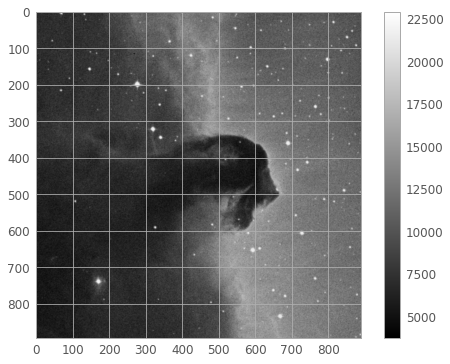

In [ ]:
plt.imshow(image_data,cmap='gray')
plt.colorbar()

# Getting Basic Statistics

In [ ]:
print('Min: ',np.min(image_data))
print('Max: ',np.max(image_data))
print('Mean: ',np.mean(image_data))
print('Std deviation: ',np.std(image_data))

Min:  3759
Max:  22918
Mean:  9831.481676287574
Std deviation:  3032.3927542049046


# Plotting a Histogram
- In order to plot a histogram of a n-D array, we have to convert it into a 1-D array.
- matplotlib.flatten() converts image_data from 2d to 1d

In [ ]:
image_data.flatten()

array([ 7201,  6642,  6642, ..., 11987, 12546, 12546], dtype=int16)

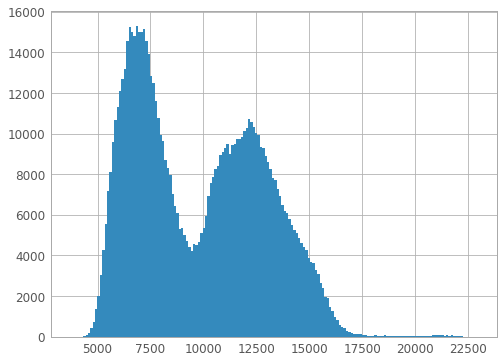

In [ ]:
histogram=plt.hist(image_data.flatten(),bins='auto')

# Using Logarithmic Scale
- We use log scale to get a brighter image

In [ ]:
from matplotlib.colors import LogNorm

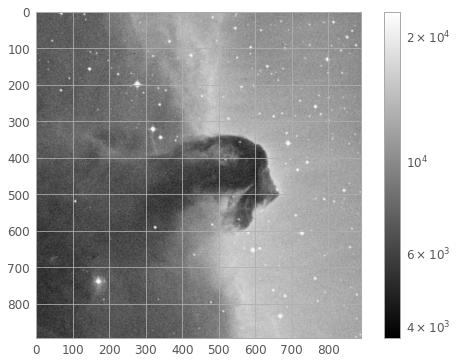

In [ ]:
plt.imshow(image_data,cmap='gray',norm=LogNorm())
plt.colorbar()

# M42 - ORION NEBULA